# Accessing NEII with Python

This notebook demonstrates how to programmatically access the National Environmental Information Infrastructure catalogue and data services using Python. First we will search the catalogue. The catalogue is an OGC compliant CSW service. To access this we can use the OWSLib Python library.

First we need to import the CatalogueServiceWeb class and the filter encoding (fes) module

In [1]:
from owslib.csw import CatalogueServiceWeb

In [2]:
from owslib import fes

Now we can instantiate an OWSLib object that connects to the service, and check the title and abstract of the service.

In [40]:
c=CatalogueServiceWeb('http://neii.bom.gov.au/services/catalogue/csw')

In [38]:
c.identification.title

In [ ]:
c.identification.abstract

To query for some records we need to use the filter encoding specification. You can do various queries e.g. spatial, temporal etc. but here we will do a simple text search for 'Water Observations'

First, define the query

In [4]:
textQuery= fes.PropertyIsLike('csw:AnyText', 'Water Observations')

Then, make the request (in OWSLib use getrecords2 not getrecords which has been deprecated)

In [5]:
c.getrecords2(constraints=[textQuery], esn='full', maxrecords=10)

And check if there are any results (in this case there are 3 matches)

In [7]:
c.results

{'matches': 3, 'nextrecord': 0, 'returned': 3}

Now loop through the results. c.records is a dictionary object so you need to access each item in the dictionary in turn. The following code access a few key properties including the service urls to see if there are any data services for the record.

In [8]:
for record in c.records:
    cswRecord = c.records[record]
    print ('*********** Record summary ************ \n')
    print ('ID:' + cswRecord.identifier)
    print (cswRecord.title)
    print (cswRecord.abstract)
    for service in cswRecord.uris:
        print (service['name']) 
        print (service['url'] + '\n')
    print ('*********** End of summary ************ \n')

*********** Record summary ************ 

ID:2aac3f90-a34e-0548-e053-10a3070a312d
Landcover 25 - Water (Water Observations from Space - WOfS) WMS
This OGC Web Map Service (WMS) provides access to the Water Observations from Space (WOfS) gridded dataset indicating areas where surface water has been observed using the Geoscience Australia's (GA) Landsat 5 and 7 satellite data holdings.  WOfS covers all of mainland Australia and Tasmania but excludes off-shore Territories.
None
http://eos.ga.gov.au/geoserver/ows?service=wms&version=1.3.0&request=GetCapabilities

*********** End of summary ************ 

*********** Record summary ************ 

ID:3440bced-e383-4f39-8991-820aeb9097cb
eReefs Marine Water Quality Web Data Services
These are the Marine Water Quality data services underlying the <a href="http://www.bom.gov.au/marinewaterquality/" target="_blank">eReefs Marine Water Quality Dashboard</a>..

The Dashboard enables access to a range of water-quality indicators for the Great Barri

In [9]:
for record in c.records:
    cswRecord = c.records[record]
    for service in cswRecord.uris:
        print (service['name']) 
        print (service['url'] + '\n')
 

None
http://eos.ga.gov.au/geoserver/ows?service=wms&version=1.3.0&request=GetCapabilities

eReefs - Marine Water Quality product (Daily Composites) - Web Map Service
http://ereeftds.bom.gov.au/ereefs/tds/wms/ereefs/mwq_gridAgg_P1D?service=WMS&version=1.3.0&request=GetCapabilities

eReefs - Marine Water Quality product (Weekly Composites) - Web Map Service
http://ereeftds.bom.gov.au/ereefs/tds/wms/ereefs/mwq_gridAgg_P1W?service=WMS&version=1.3.0&request=GetCapabilities

eReefs - Marine Water Quality product (Monthly Composites) - Web Map Service
http://ereeftds.bom.gov.au/ereefs/tds/wms/ereefs/mwq_gridAgg_P1M?service=WMS&version=1.3.0&request=GetCapabilities

eReefs - Marine Water Quality product (Seasonal Composites) - Web Map Service
http://ereeftds.bom.gov.au/ereefs/tds/wms/ereefs/mwq_gridAgg_P6M?service=WMS&version=1.3.0&request=GetCapabilities

eReefs - Marine Water Quality product (Annual Composites) - Web Map Service
http://ereeftds.bom.gov.au/ereefs/tds/wms/ereefs/mwq_gridAgg_P1

Now we have found some OGC Web Map Services (WMS) containing Water Observations information. We can use OWSLib again to query a WMS and get back a map image. We will query the GA Water Observations from Space Web Map Service.

In [10]:
from owslib.wms import WebMapService

In [11]:
wms=WebMapService('http://eos.ga.gov.au/geoserver/ows?')

In [12]:
wms.identification.title

'GeoServer Web Map Service'

In [13]:
list(wms.contents)

['NFRIP-WOfS:ClearObservations',
 'NFRIP-WOfS:ClearObservations_previous',
 'NFRIP-WOfS:Confidence',
 'NFRIP-WOfS:Confidence_previous',
 'ITEM:ITEM_CL_mosaic_1987_2015',
 'ITEM:ITEM_CoastalCells',
 'ITEM:ITEM_REL_mosaic_1987_2015',
 'NFRIP-WOfS:WaterObservations',
 'NFRIP-WOfS:WaterObservations_previous',
 'NFRIP-WOfS:WaterSummary',
 'NFRIP-WOfS:WaterSummaryFiltered',
 'NFRIP-WOfS:WaterSummaryFiltered_previous',
 'NFRIP-WOfS:WaterSummary_previous']

In [14]:
wms['NFRIP-WOfS:ClearObservations'].title

'ClearObservations'

In [15]:
wms['NFRIP-WOfS:ClearObservations'].boundingBox

(111.58, -48.92, 154.42, -6.08, 'EPSG:4326')

In [16]:
wms['NFRIP-WOfS:ClearObservations'].crsOptions

['EPSG:24880',
 'EPSG:2425',
 'EPSG:6587',
 'EPSG:5935',
 'EPSG:21817',
 'EPSG:2245',
 'EPSG:2693',
 'EPSG:6690',
 'EPSG:2011',
 'EPSG:26841',
 'EPSG:6467',
 'EPSG:2587',
 'EPSG:3948',
 'EPSG:26834',
 'EPSG:3664',
 'EPSG:6474',
 'EPSG:5923',
 'EPSG:6617',
 'EPSG:32504',
 'EPSG:2232',
 'EPSG:3903',
 'EPSG:4681',
 'EPSG:5959',
 'EPSG:2362',
 'EPSG:6691',
 'EPSG:5807',
 'EPSG:2618',
 'EPSG:6790',
 'EPSG:32061',
 'EPSG:31976',
 'EPSG:3541',
 'EPSG:4639',
 'EPSG:66076405',
 'EPSG:20069',
 'EPSG:61536405',
 'EPSG:26769',
 'EPSG:30493',
 'EPSG:32234',
 'EPSG:5346',
 'EPSG:4783',
 'EPSG:3028',
 'EPSG:2092',
 'EPSG:42308',
 'EPSG:31259',
 'EPSG:6386',
 'EPSG:26991',
 'EPSG:4615',
 'EPSG:30168',
 'EPSG:30340',
 'EPSG:21462',
 'EPSG:5972',
 'EPSG:6634',
 'EPSG:5392',
 'EPSG:2665',
 'EPSG:20350',
 'EPSG:32242',
 'EPSG:3080',
 'EPSG:3775',
 'EPSG:4418',
 'EPSG:26937',
 'EPSG:26822',
 'EPSG:4189',
 'EPSG:26830',
 'EPSG:66196405',
 'EPSG:3258',
 'EPSG:6577',
 'EPSG:4242',
 'EPSG:61406405',
 'EPSG:213

In [17]:
wms['NFRIP-WOfS:ClearObservations'].styles

{'ClearObservations': {'legend': 'http://eos.ga.gov.au:80/geoserver/wms?request=GetLegendGraphic&format=image%2Fpng&width=20&height=20&layer=NFRIP-WOfS%3AClearObservations',
  'title': 'WOfS Style: Clear Observations'}}

In [18]:
wms.getOperationByName('GetMap').formatOptions

['image/png',
 'application/atom xml',
 'application/atom+xml',
 'application/openlayers',
 'application/pdf',
 'application/rss xml',
 'application/rss+xml',
 'application/vnd.google-earth.kml',
 'application/vnd.google-earth.kml xml',
 'application/vnd.google-earth.kml+xml',
 'application/vnd.google-earth.kml+xml;mode=networklink',
 'application/vnd.google-earth.kmz',
 'application/vnd.google-earth.kmz xml',
 'application/vnd.google-earth.kmz+xml',
 'application/vnd.google-earth.kmz;mode=networklink',
 'atom',
 'image/geotiff',
 'image/geotiff8',
 'image/gif',
 'image/gif;subtype=animated',
 'image/jpeg',
 'image/png8',
 'image/png; mode=8bit',
 'image/svg',
 'image/svg xml',
 'image/svg+xml',
 'image/tiff',
 'image/tiff8',
 'kml',
 'kmz',
 'openlayers',
 'rss',
 'text/html; subtype=openlayers']

Now we have information about the layer we can make a request for a map.

In [19]:
wms['NFRIP-WOfS:ClearObservations'].timepositions

In [20]:
img = wms.getmap(layers = ['NFRIP-WOfS:ClearObservations'],
                 srs='EPSG:4326',
                 bbox=(111.58, -48.92, 154.42, -6.08),
                 size=(500,500),
                 format='image/png',
                transparent = True)

In [21]:
out=open('mapimage.png', 'wb')

In [22]:
out.write(img.read())

77385

In [23]:
out.close()

Now lets view the map!

In [24]:
from IPython.display import Image

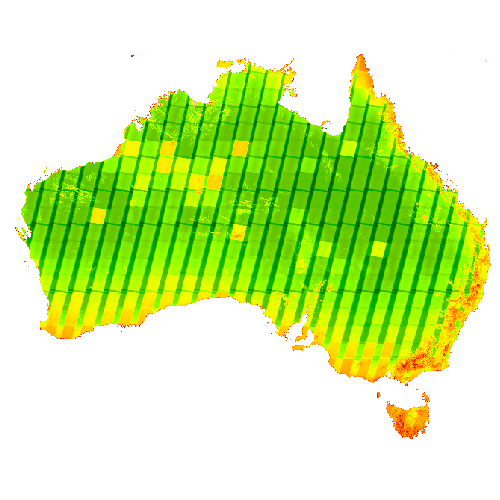

In [25]:
Image('mapimage.png')

To understand this map we need a legend. The legend URL is attached to a particular style in the WMS. We used the 'ClearObservations' style so we need to get that legend url and use it to request the legend image.

In [26]:
legendURL=wms['NFRIP-WOfS:ClearObservations'].styles['ClearObservations']['legend']

In [27]:
Image(url=legendURL)